# Bar Plots

In [1]:
import os, sys, inspect
import numpy as np
import matplotlib.pyplot as plt
# add parent dir to system dir
currdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
rootdir = os.path.dirname(currdir)
sys.path.insert(0, rootdir)

from src.plot import bar
import pandas as pd

In [3]:
# Importing file
data = "../data/int/realestate_demographics.csv"
# Reading the file
df_data = pd.read_csv(data)
df_data.head()

,Zip Code,Year,Month,Home Value Index,Median Listing Price,Median Listing Price Per sqf,Sales,Median Income (dollars),Number of Households,School Rating (Parent),...,Liquor Store Count,Wal-Mart Count,Starbucks Count,Target Count,Inventory Measure,Median Price Cut,Median Price of Reduction,Median Rental Price,Latitude,Longitude
0,78701,1996,4,152500.0,NaN,NaN,NaN,NaN,NaN,2.8,...,61,1,29,7,NaN,NaN,NaN,NaN,30.272921,-97.744386
1,78701,1996,5,153600.0,NaN,NaN,NaN,NaN,NaN,2.8,...,61,1,29,7,NaN,NaN,NaN,NaN,30.272921,-97.744386
2,78701,1996,6,154600.0,NaN,NaN,NaN,NaN,NaN,2.8,...,61,1,29,7,NaN,NaN,NaN,NaN,30.272921,-97.744386
3,78701,1996,7,155500.0,NaN,NaN,NaN,NaN,NaN,2.8,...,61,1,29,7,NaN,NaN,NaN,NaN,30.272921,-97.744386
4,78701,1996,8,156300.0,NaN,NaN,NaN,NaN,NaN,2.8,...,61,1,29,7,NaN,NaN,NaN,NaN,30.272921,-97.744386


# Construction Dynamics and ZHVI 
(5 Most Expensive/Cheapest Neighborhoods )

In [5]:

bar_plot_2 = df_data[["Zip Code", "Year", "Month", "Home Value Index", "Total_NewConstructions"]]
# bar_plot_2.head()
year_select = 2018
# month_select = 4
plot_2 = bar_plot_2.loc[bar_plot_2["Year"]==year_select]
plot_2.head()

,Zip Code,Year,Month,Home Value Index,Total_NewConstructions
261,78701,2018,1,408700.0,0.0
262,78701,2018,2,411800.0,NaN
263,78701,2018,3,417300.0,NaN
264,78701,2018,4,420500.0,0.0
526,78702,2018,1,404700.0,41.0


In [6]:
# Group by zip code and year
bar_plot_g2 = plot_2.groupby(["Year", "Zip Code"])
sort_bar2 = bar_plot_g2.mean().sort_values(["Home Value Index"], ascending=False, inplace=False)
sort_top_5 = sort_bar2.loc[:,["Home Value Index", "Total_NewConstructions"]].head()
home_value = sort_top_5["Home Value Index"]
tot_const = sort_top_5["Total_NewConstructions"]*4 #Because we got the mean of constructions and we need total
sort_top_5

Home Value Index  Total_NewConstructions
Year Zip Code                                          
2018 78746             884325.0                8.250000
     78703             794575.0               18.000000
     78730             616950.0                3.000000
     78733             597225.0                0.666667
     78731             567950.0                8.500000

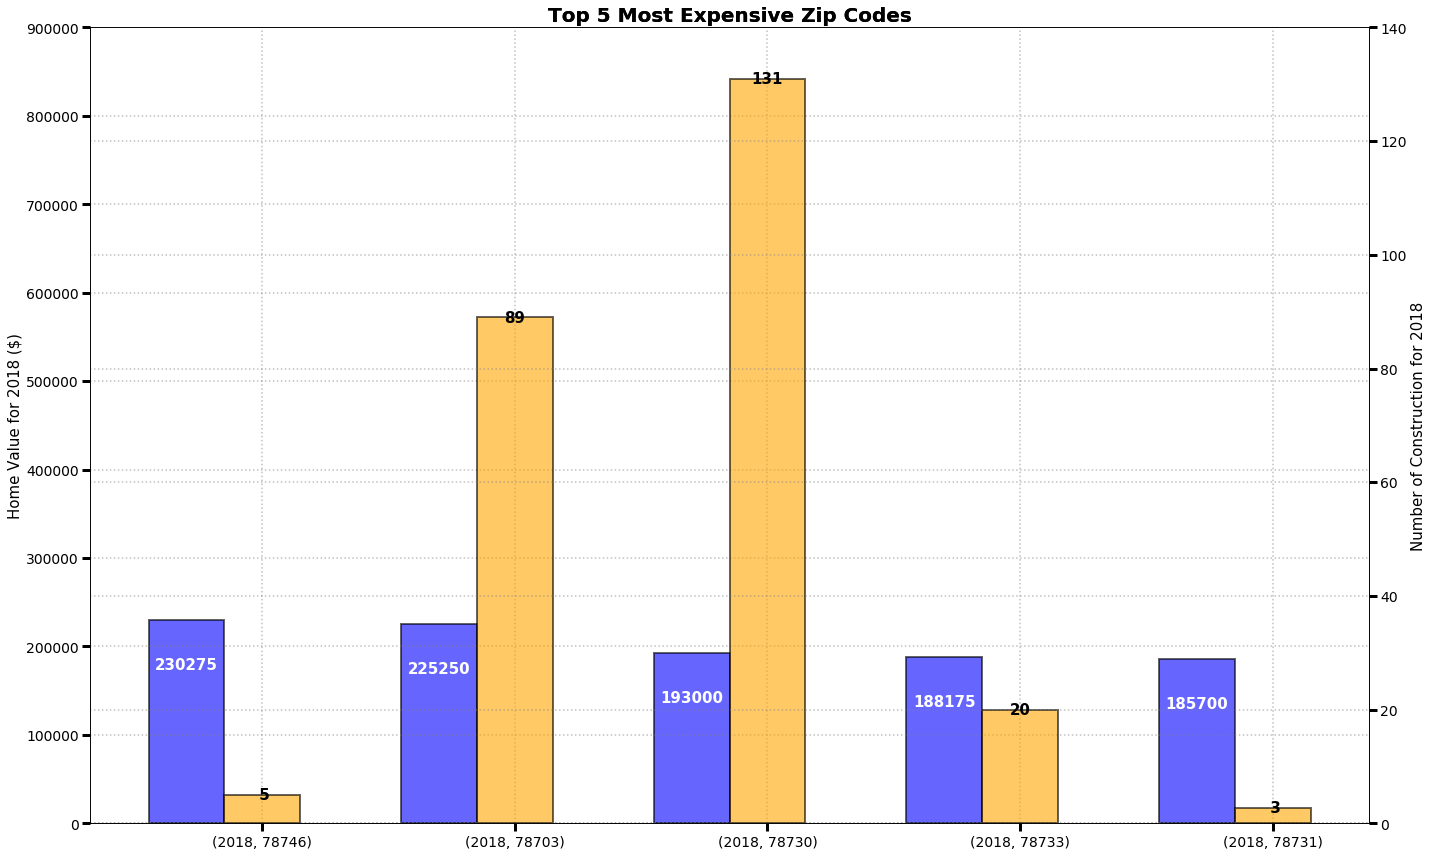

In [12]:

figsize = (20, 12)
fig = plt.figure(figsize=figsize)
ax1 = fig.subplots(1, 1)

# labels = bar_plot_g2.mean().head().index.values
labels = sort_top_5.head().index.values
x = np.arange(len(labels))
width = 0.3
height = home_value
height2 = tot_const

title = "Top 5 Most Expensive Zip Codes"
ylabel = f"Home Value for {year_select} ($)"
ylabel2 = f"Number of Construction for {year_select}"

plt.ylim(0,900000)

bar(height, ticklabels=labels,
    ylabel=ylabel,
    ax=ax1, title=title, width=width, 
    x=x)

ax2 = ax1.twinx()
# ax2.text(labels, height2, s="{:2.0f}".format(height2), horizontalalignment="center")
bar(height2, ticklabels=labels,
    ylabel=ylabel2,
    ax=ax2, title=title, width=width, 
    x=x+width, color="orange", aligh="center", labelcolor="black")

ax2.set_ylim(0, 140)

plt.savefig("../Reports/Figures/ZHVI_vs_construction-top.png")

In [13]:
sort_bar2 = bar_plot_g2.mean().sort_values(["Home Value Index"], ascending=False, inplace=False)
sort_bot_5 = sort_bar2.loc[:,["Home Value Index", "Total_NewConstructions"]].tail()
home_value = sort_bot_5["Home Value Index"]
tot_const = sort_bot_5["Total_NewConstructions"]*4 #Because we got the mean of constructions
sort_bot_5

Home Value Index  Total_NewConstructions
Year Zip Code                                          
2018 78753             230275.0                1.250000
     78741             225250.0               22.250000
     78744             193000.0               32.750000
     78724             188175.0                5.000000
     78725             185700.0                0.666667

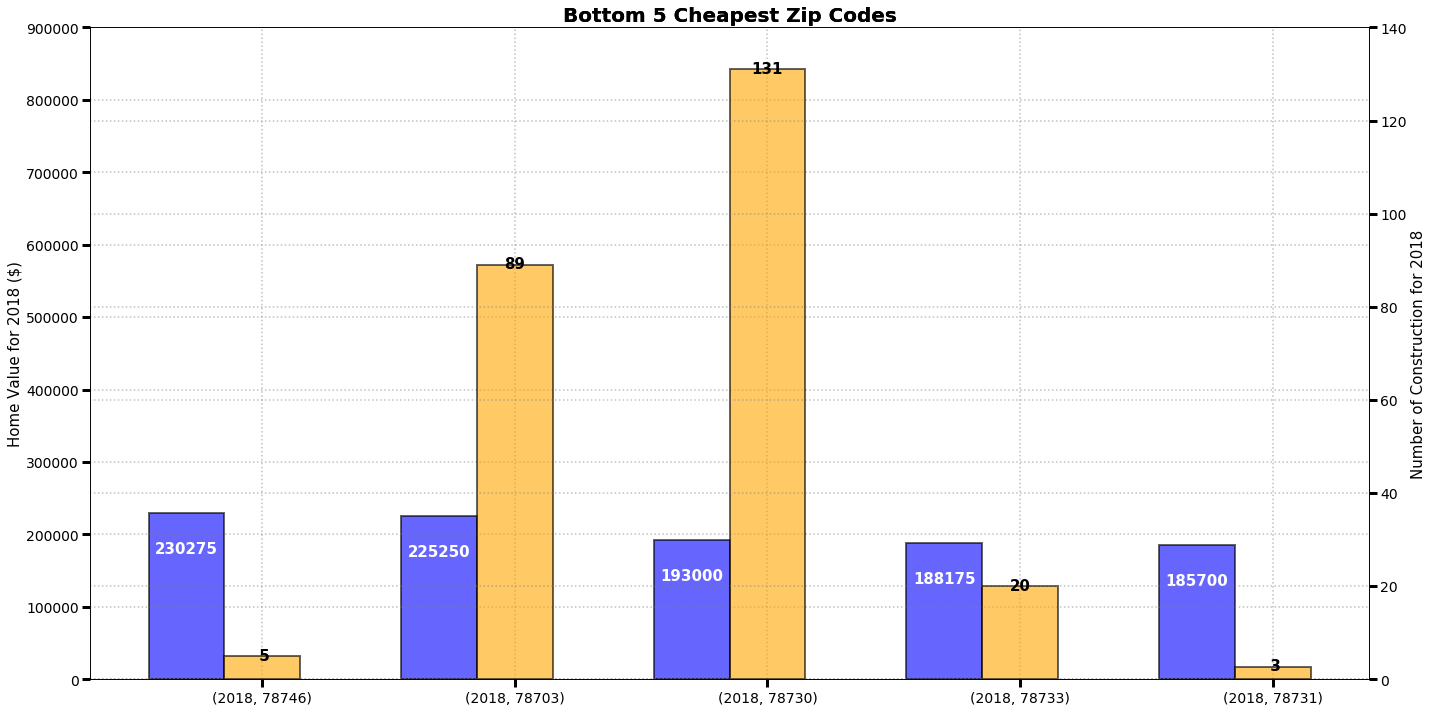

In [14]:
figsize = (20, 10)
fig = plt.figure(figsize=figsize)
ax1 = fig.subplots(1, 1)

# labels = bar_plot_g2.mean().head().index.values
labels = sort_top_5.tail().index.values
x = np.arange(len(labels))
width = 0.3
height = home_value
height2 = tot_const

title = "Bottom 5 Cheapest Zip Codes"
ylabel = f"Home Value for {year_select} ($)"
ylabel2 = f"Number of Construction for {year_select}"

plt.ylim(0,900000)

bar(height, ticklabels=labels,
    ylabel=ylabel,
    ax=ax1, title=title, width=width, 
    x=x)

ax2 = ax1.twinx()
# ax2.text(labels, height2, s="{:2.0f}".format(height2), horizontalalignment="center")
bar(height2, ticklabels=labels,
    ax=ax2, ylabel=ylabel2, title=title, width=width, 
    x=x+width, color="orange", aligh="center", labelcolor="black")

ax2.set_ylim(0, 140)

plt.savefig("../Reports/Figures/ZHVI_vs_construction-bottom.png")

# School Quality and ZHVI 
(5 Most Expensive/Cheapest Neighborhoods )

In [15]:
# bar_plot_1 = df_data[["Zip Code", "Year", "Month", "Home Value Index", "Median Income (dollars)"]]
bar_plot_4 = df_data[["Zip Code", "Year", "Month", "Home Value Index", "School Rating(GS)"]]
bar_plot_4.head()

,Zip Code,Year,Month,Home Value Index,School Rating(GS)
0,78701,1996,4,152500.0,1.4
1,78701,1996,5,153600.0,1.4
2,78701,1996,6,154600.0,1.4
3,78701,1996,7,155500.0,1.4
4,78701,1996,8,156300.0,1.4


In [17]:
year_select = 2018
# month_select = 4
plot_4 = bar_plot_4.loc[bar_plot_4["Year"]==year_select]
plot_4.head()

,Zip Code,Year,Month,Home Value Index,School Rating(GS)
261,78701,2018,1,408700.0,1.40
262,78701,2018,2,411800.0,1.40
263,78701,2018,3,417300.0,1.40
264,78701,2018,4,420500.0,1.40
526,78702,2018,1,404700.0,3.08


In [18]:
# Group by zip code and year
bar_plot_g4 = plot_4.groupby(["Year", "Zip Code"])

sort_bar4 = bar_plot_g4.mean().sort_values(["Home Value Index"], ascending=False, inplace=False)
sort_top_5_2 = sort_bar4.loc[:,["Home Value Index", "School Rating(GS)"]].head()
home_value = sort_top_5_2["Home Value Index"]
sch_rating = sort_top_5_2["School Rating(GS)"]
sort_top_5_2

Home Value Index  School Rating(GS)
Year Zip Code                                     
2018 78746             884325.0               4.27
     78703             794575.0               5.22
     78730             616950.0               8.00
     78733             597225.0               6.67
     78731             567950.0               2.78

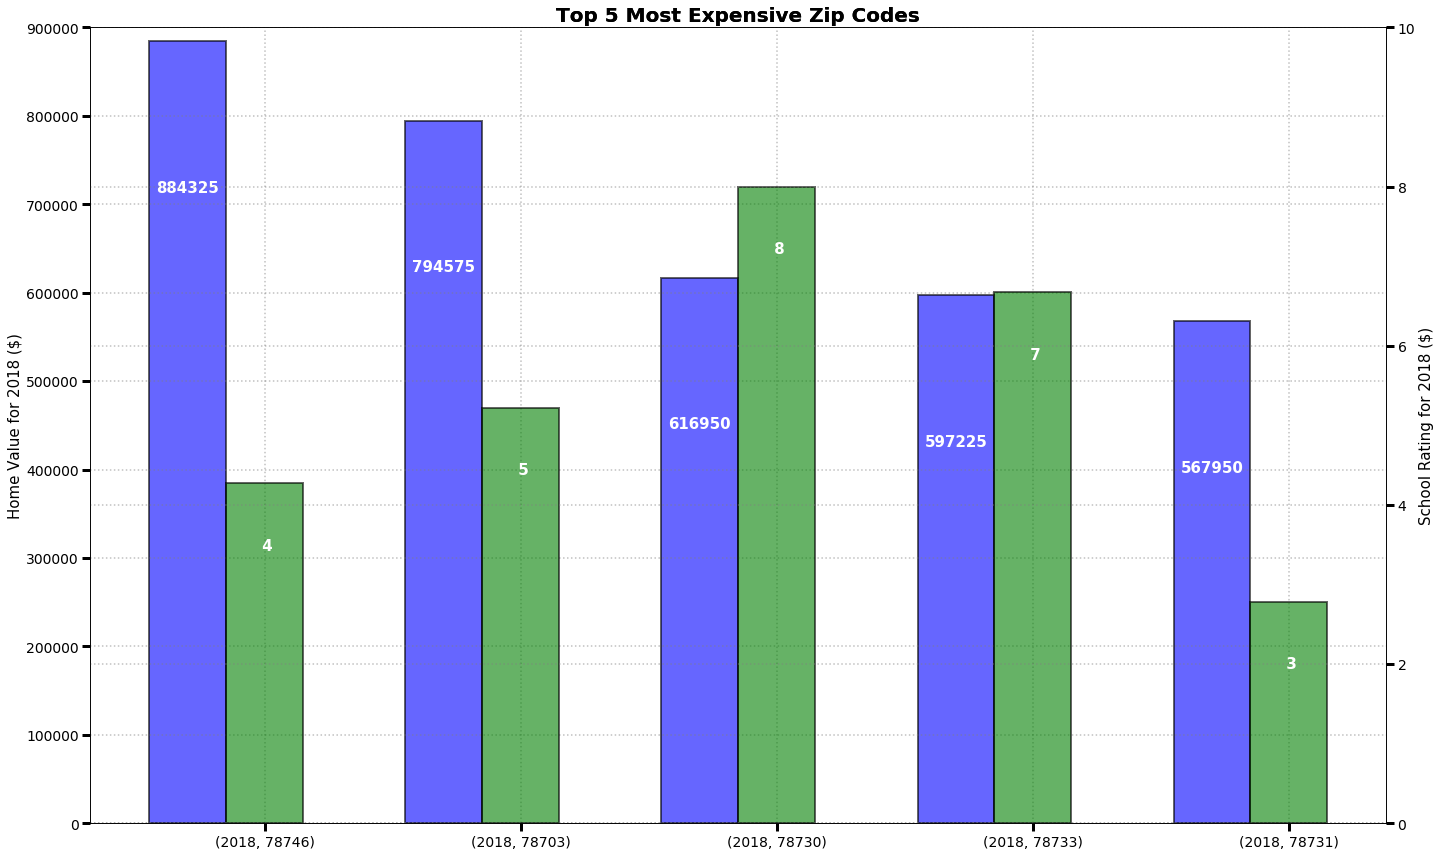

In [20]:

figsize = (20, 12)
fig = plt.figure(figsize=figsize)
ax1 = fig.subplots(1, 1)

# labels = bar_plot_g2.mean().head().index.values
labels = sort_top_5_2.head().index.values
x = np.arange(len(labels))
width = 0.3
height = home_value
height2 = sch_rating

title = "Top 5 Most Expensive Zip Codes"
ylabel = f"Home Value for {year_select} ($)"
ylabel2 = f"School Rating for {year_select} ($)"

plt.ylim(0,900000)

bar(height, ticklabels=labels,
    ylabel=ylabel,
    ax=ax1, title=title, width=width, 
    x=x)
ax2 = ax1.twinx()
# ax2.text(labels, height2, s="{:2.0f}".format(height2), horizontalalignment="center")
bar(height2, ticklabels=labels,
    ylabel=ylabel2,
    ax=ax2, title=title, width=width, 
    x=x+width, color="green")
ax2.set_ylim(0, 10)

plt.savefig("../Reports/Figures/ZHVI_vs_SchoolRaitings-top.png")

In [21]:
sort_bot_5_2 = sort_bar4.loc[:,["Home Value Index", "School Rating(GS)"]].tail()
home_value = sort_bot_5_2["Home Value Index"]
sch_rating = sort_bot_5_2["School Rating(GS)"]
sort_bot_5_2

Home Value Index  School Rating(GS)
Year Zip Code                                     
2018 78753             230275.0               3.50
     78741             225250.0               4.33
     78744             193000.0               3.45
     78724             188175.0               3.94
     78725             185700.0               3.00

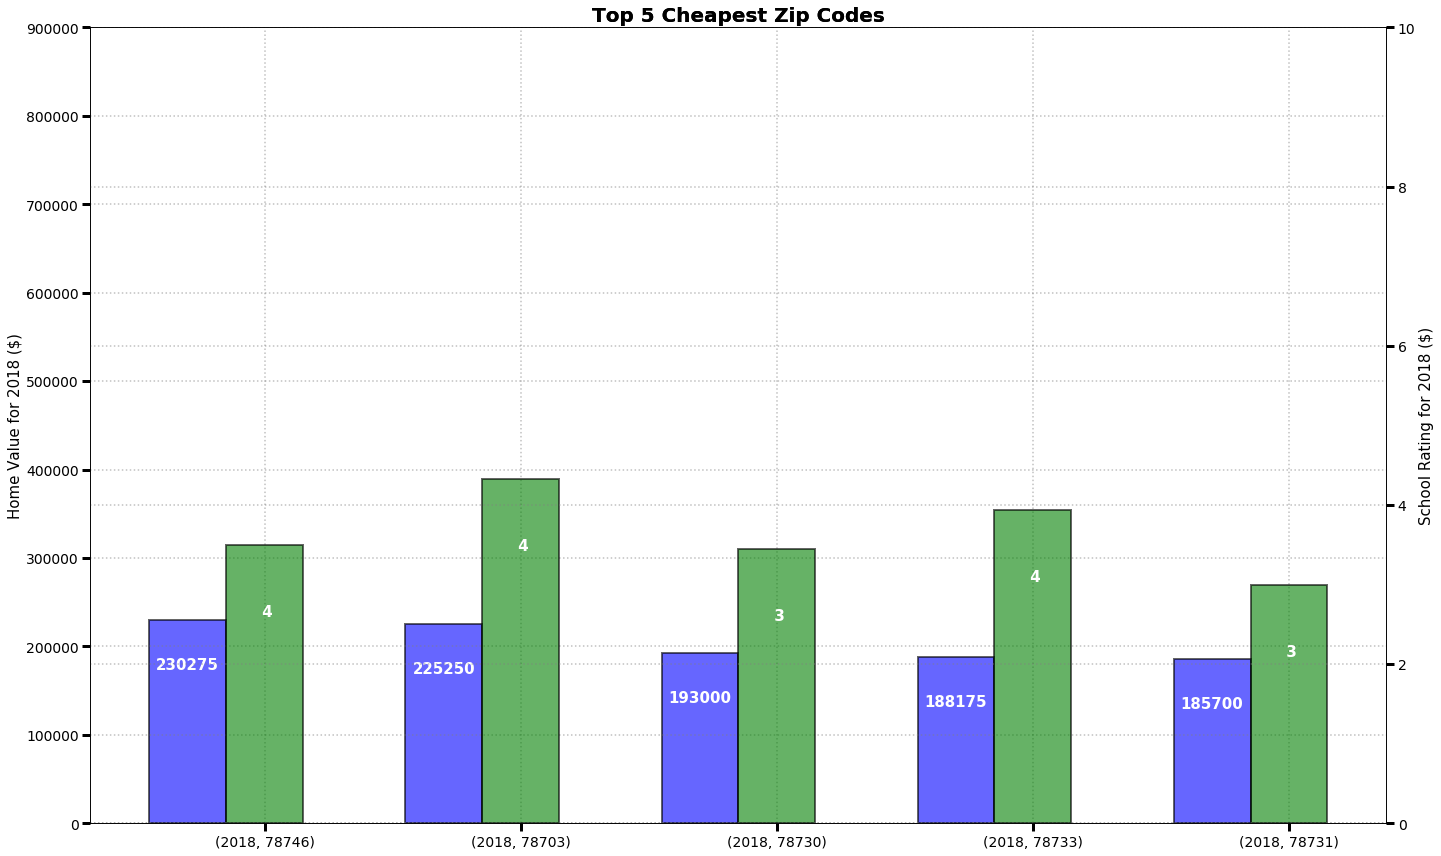

In [23]:

figsize = (20, 12)
fig = plt.figure(figsize=figsize)
ax1 = fig.subplots(1, 1)

# labels = bar_plot_g2.mean().head().index.values
labels = sort_top_5_2.tail().index.values
x = np.arange(len(labels))
width = 0.3
height = home_value
height2 = sch_rating

title = "Top 5 Cheapest Zip Codes"
ylabel = f"Home Value for {year_select} ($)"
ylabel2 = f"School Rating for {year_select} ($)"

plt.ylim(0,900000)

bar(height, ticklabels=labels,
    ylabel=ylabel,
    ax=ax1, title=title, width=width, 
    x=x)

ax2 = ax1.twinx()
# ax2.text(labels, height2, s="{:2.0f}".format(height2), horizontalalignment="center")
bar(height2, ticklabels=labels,
    ylabel=ylabel2,
    ax=ax2, title=title, width=width, 
    x=x+width, color="green")
ax2.set_ylim(0, 10)

plt.savefig("../Reports/Figures/ZHVI_vs_SchoolRaitings-bottom.png")

# Household Income and ZHVI 
(5 Most Expensive/Cheapest Neighborhoods )

In [24]:
# bar_plot_1 = df_data[["Zip Code", "Year", "Month", "Home Value Index", "Median Income (dollars)"]]
bar_plot_5 = df_data[["Zip Code", "Year", "Month", "Home Value Index", "Median Income (dollars)"]]
bar_plot_5.head()

,Zip Code,Year,Month,Home Value Index,Median Income (dollars)
0,78701,1996,4,152500.0,NaN
1,78701,1996,5,153600.0,NaN
2,78701,1996,6,154600.0,NaN
3,78701,1996,7,155500.0,NaN
4,78701,1996,8,156300.0,NaN


In [25]:
year_select = 2016
month_select = 1
plot_5 = bar_plot_5.loc[bar_plot_5["Year"]==year_select]
plot_5.head()

,Zip Code,Year,Month,Home Value Index,Median Income (dollars)
237,78701,2016,1,372800.0,96926.416667
238,78701,2016,2,375900.0,97397.833333
239,78701,2016,3,375300.0,97869.250000
240,78701,2016,4,369600.0,98340.666667
241,78701,2016,5,366400.0,98812.083333


In [26]:
# Group by zip code and year
bar_plot_g5 = plot_5.groupby(["Year", "Zip Code"])

sort_bar5 = bar_plot_g5.mean().sort_values(["Home Value Index"], ascending=False, inplace=False)
sort_top_5_3 = sort_bar5.loc[:,["Home Value Index", "Median Income (dollars)"]].head()
home_value = sort_top_5_3["Home Value Index"]
med_inc = sort_top_5_3["Median Income (dollars)"]
sort_top_5_3

Home Value Index  Median Income (dollars)
Year Zip Code                                           
2016 78746        798033.333333            130549.458333
     78703        723183.333333             90645.458333
     78730        589300.000000            105056.666667
     78731        534508.333333             83187.750000
     78733        522708.333333            130374.125000

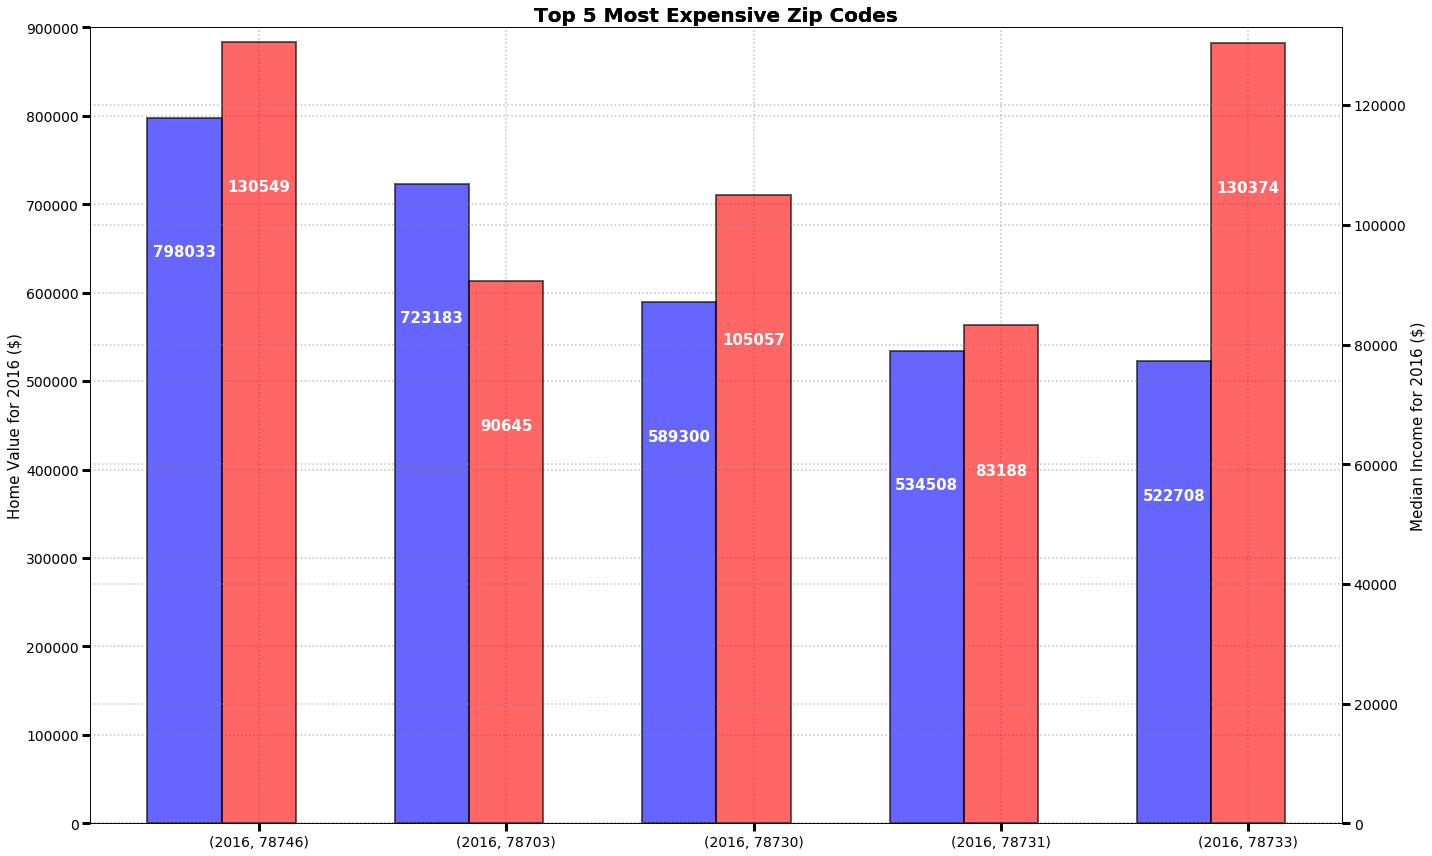

In [27]:

figsize = (20, 12)
fig = plt.figure(figsize=figsize)
ax1 = fig.subplots(1, 1)

# labels = bar_plot_g2.mean().head().index.values
labels = sort_top_5_3.head().index.values
x = np.arange(len(labels))
width = 0.3
height = home_value
height2 = med_inc

title = "Top 5 Most Expensive Zip Codes"
ylabel = f"Home Value for {year_select} ($)"
ylabel2 = f"Median Income for {year_select} ($)"

plt.ylim(0,900000)

bar(height, ticklabels=labels,
    ylabel=ylabel,
    ax=ax1, title=title, width=width, 
    x=x)
ax2 = ax1.twinx()
# ax2.text(labels, height2, s="{:2.0f}".format(height2), horizontalalignment="center")
bar(height2, ticklabels=labels,
    ylabel=ylabel2,
    ax=ax2, title=title, width=width, 
    x=x+width, color="red")
ax2.set_ylim(0, 133000)

plt.savefig("../Reports/Figures/ZHVI_vs_HouseholdIncome-top.png")

In [28]:
sort_top_5_3 = sort_bar5.loc[:,["Home Value Index", "Median Income (dollars)"]].tail()
home_value = sort_top_5_3["Home Value Index"]
med_inc = sort_top_5_3["Median Income (dollars)"]
sort_top_5_3

Home Value Index  Median Income (dollars)
Year Zip Code                                           
2016 78741        197958.333333             33440.708333
     78753        193175.000000             40978.875000
     78725        165025.000000             56763.500000
     78724        162425.000000             40410.583333
     78744        157383.333333             43215.125000

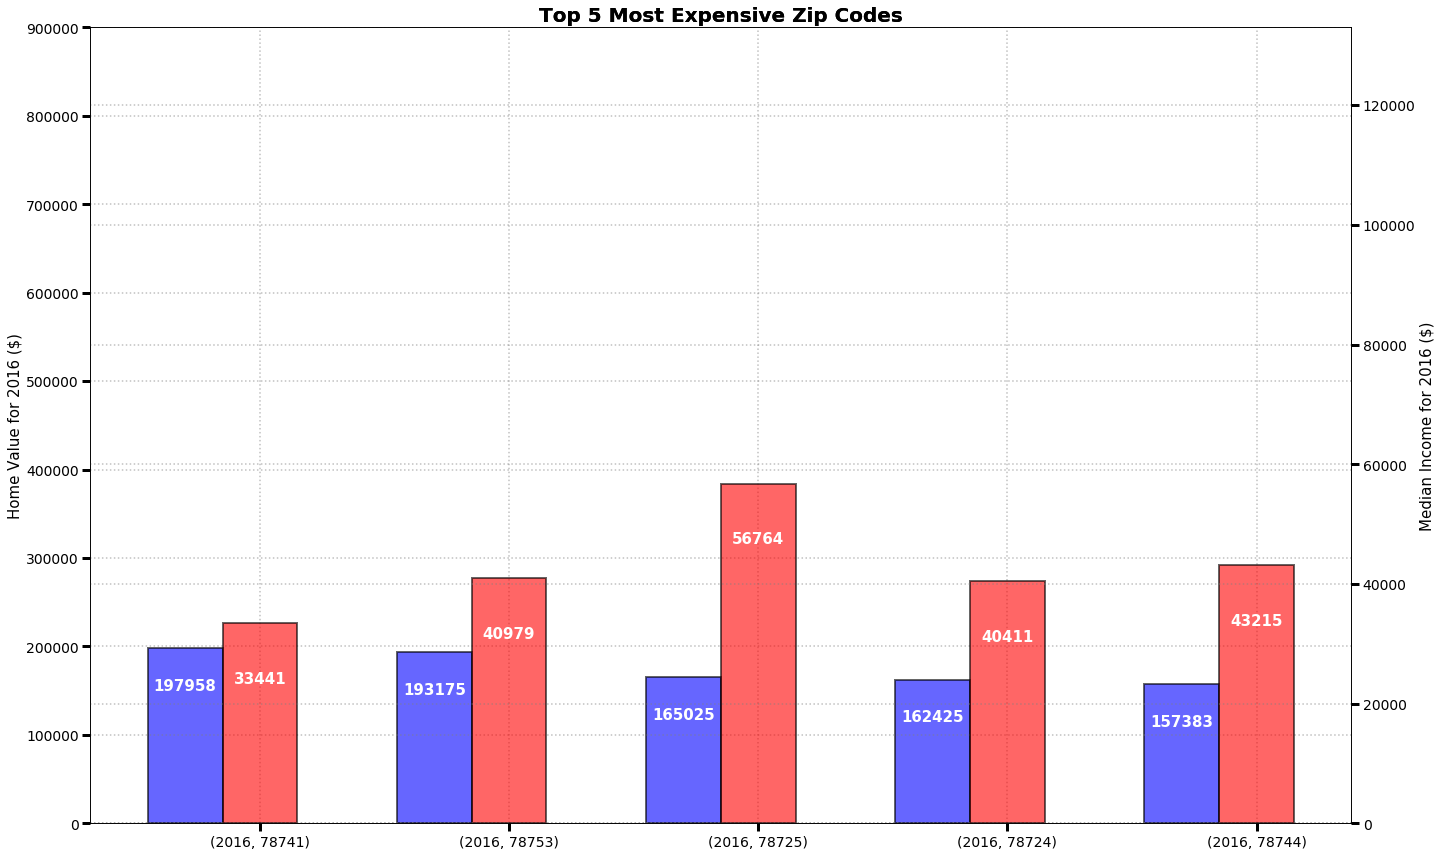

In [29]:

figsize = (20, 12)
fig = plt.figure(figsize=figsize)
ax1 = fig.subplots(1, 1)

# labels = bar_plot_g2.mean().head().index.values
labels = sort_top_5_3.head().index.values
x = np.arange(len(labels))
width = 0.3
height = home_value
height2 = med_inc

title = "Top 5 Most Expensive Zip Codes"
ylabel = f"Home Value for {year_select} ($)"
ylabel2 = f"Median Income for {year_select} ($)"

plt.ylim(0,900000)

bar(height, ticklabels=labels,
    ylabel=ylabel,
    ax=ax1, title=title, width=width, 
    x=x)
ax2 = ax1.twinx()
# ax2.text(labels, height2, s="{:2.0f}".format(height2), horizontalalignment="center")
bar(height2, ticklabels=labels,
    ylabel=ylabel2,
    ax=ax2, title=title, width=width, 
    x=x+width, color="red")
ax2.set_ylim(0, 133000)

plt.savefig("../Reports/Figures/ZHVI_vs_HouseholdIncome-bottom.png")